In [5]:
import pennylane as qml
import matplotlib.pyplot as plt
from pennylane import numpy as np
from pennylane.templates import StronglyEntanglingLayers, BasicEntanglerLayers


In [6]:
def FourierCoefficients(f,k):
    NumbCoeffs = 2*k+1
    t = np.linspace(0,2*np.pi, NumbCoeffs, endpoint=False)
    y = np.fft.rfft(f(t))/t.size
    
    return y


In [7]:
scaling = 1
NumbQubit = 4

dev = qml.device('default.qubit', wires = NumbQubit)

def S(x):
    for i in range(NumbQubit):
        qml.RX(scaling*x, wires=i)

def W(theta):
    BasicEntanglerLayers(theta, wires=range(NumbQubit))

@qml.qnode(dev)
def QuModel(weights,x):
    W(weights[0])
    S(x)
    W(weights[1])

    return qml.expval(qml.PauliZ(wires=0))

AnsatzLayer = 1

def RandWeights():
    return 2*np.pi*np.random.random(size=(2, AnsatzLayer, NumbQubit))

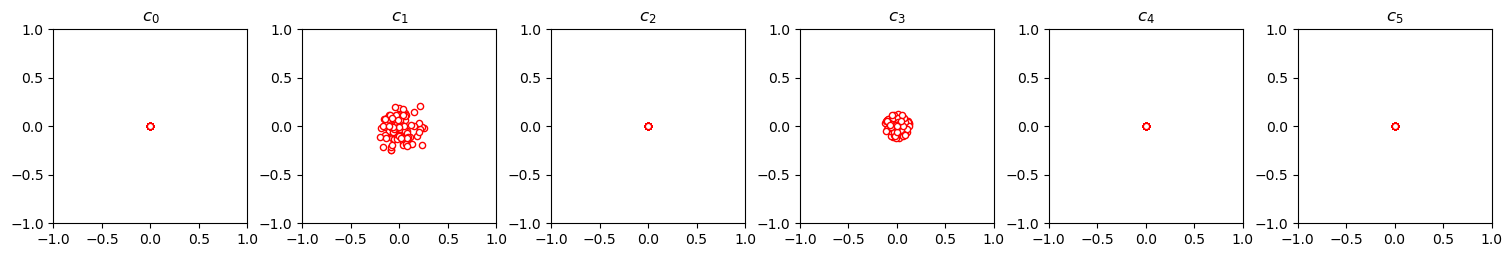

In [8]:
NumbCoeffs = 5
NumbSamples = 100
x = np.linspace(-10,10,100,requires_grad=False)
coeffs = []

for i in range(NumbSamples):
    Weights = RandWeights()

    def f(x):
        return np.array([QuModel(Weights, X) for X in x])
    
    CoeffsSample = FourierCoefficients(f, NumbCoeffs)
    coeffs.append(CoeffsSample)

coeffs = np.array(coeffs)
CoeffsReal = np.real(coeffs)
CoeffsImg = np.imag(coeffs)

NumbCoeffs = len(CoeffsReal[0])
fig,ax = plt.subplots(1,NumbCoeffs, figsize = (15,4) )

for idx, ax_ in enumerate(ax):
    ax_.set_title(r"$c_{}$".format(idx))
    ax_.scatter(CoeffsReal[:, idx], CoeffsImg[:, idx], s=20,
                facecolor='white', edgecolor='red')
    ax_.set_aspect("equal")
    ax_.set_ylim(-1, 1)
    ax_.set_xlim(-1, 1)


plt.tight_layout(pad=0.5)
plt.show();